# TCModel Including Image-Derived Input Functions or Twilite Data

## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np

from Boxcar import Boxcar
from RadialArtery import RadialArtery
from Raichle1983ModelAndArtery import Raichle1983ModelAndArtery

In [2]:
# define data & models
petdir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421152358", "pet")
idif = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif.nii.gz")
twil = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
kern = os.path.join(petdir, "kernel_hct=46.8.nii.gz")
pet = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-BrainMoCo2-createNiftiMovingAvgFrames-ParcWmparc-reshape-to-wmparc-select-all.nii.gz")
bc = Boxcar(idif, 
            truths=[13.645239325355200, 11.606092100541100, 53.709703614415100,
                    0.9508763104539800, 6.115187219628200, 1.5953575251551600, -0.9738875457526370, -0.0003611596906374450, 23.08907726925360,
                    0.06025649665687820, 0.02786817660202240, 0.021930942607943000, 
                    2.4547786756263200,
                    0.0009998703920191730],
            nlive=100)
ra = RadialArtery(twil, 
                  kern, 
                  truths=[11.484636938903700, 9.038382807893550, 28.568246786745600,
                          4.5866245255678400, 11.95532505177820, 2.566526335309770, -4.459469081789230, -6.0112371284438400, 25.2540519845093, 
                          0.020278321953784300, 0.008119846365675890, 0.07320044514638420,
                          2.442656141915740, 
                          0.02215511898025070],
                  nlive=100)
rm = Raichle1983ModelAndArtery(idif, pet, nlive=100)

Boxcar: found data for tracer ho
RadialArtery: found data for tracer ho


## Inspect Boxcar

In [3]:
v = bc.truths
pprint("===================================== v ======================================")
pprint(v)

data = bc.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[13.6452393253552,
 11.6060921005411,
 53.7097036144151,
 0.95087631045398,
 6.1151872196282,
 1.59535752515516,
 -0.973887545752637,
 -0.000361159690637445,
 23.0890772692536,
 0.0602564966568782,
 0.0278681766020224,
 0.021930942607943,
 2.45477867562632,
 0.000999870392019173]
'==================================== data ===================================='
{'taus': array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10

In [4]:
pprint("============================== bc.data2t(data) ===============================")
pprint(bc.data2t(data))
pprint("============================= bc.data2taus(data) =============================")
pprint(bc.data2taus(data))
pprint("=========================== bc.data2timesMid(data) ===========================")
pprint(bc.data2timesMid(data))
pprint("================================== bc.fqfp ===================================")
pprint(bc.fqfp)
pprint("========================== bc.input_func_measurement =========================")
pprint(bc.input_func_measurement)
pprint("================================= bc.labels ==================================")
pprint(bc.labels)
pprint("====================== bc.load_nii(bc.fqfp + '.nii.gz') ======================")
pprint(bc.load_nii(bc.fqfp + ".nii.gz"))
pprint("=============================== bc.loglike(v) ================================")
pprint(bc.loglike(v))
pprint("================================== bc.ndim ===================================")
pprint(bc.ndim)
pprint("========================= bc.parse_halflife(bc.fqfp) =========================")
pprint(bc.parse_halflife(bc.fqfp))
pprint("========================= bc.parse_isotope(bc.fqfp) ==========================")
pprint(bc.parse_isotope(bc.fqfp))
pprint("================================== bc.sigma ==================================")
pprint(bc.sigma)
pprint("============================ bc.signalmodel(data) ============================")
pprint(bc.signalmodel(data))

'============================== bc.data2t(data) ==============================='
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118.])
'============================= bc.data2taus(data) ============================='
array([10., 10., 10., 10., 10., 10., 10., 10.,

In [5]:
# pprint("========================== bc.prior_transform('ho') ==========================")
# pprint(bc.prior_transform("ho"))
# pprint("======================== bc.prior_transform_default(v) =======================")
# pprint(bc.prior_transform_default(v))
# pprint("========================== bc.prior_transform_co(v) ==========================")
# pprint(bc.prior_transform_co(v))
# pprint("========================== bc.prior_transform_oo(v) ==========================")
# pprint(bc.prior_transform_oo(v))

## Plot Boxcar

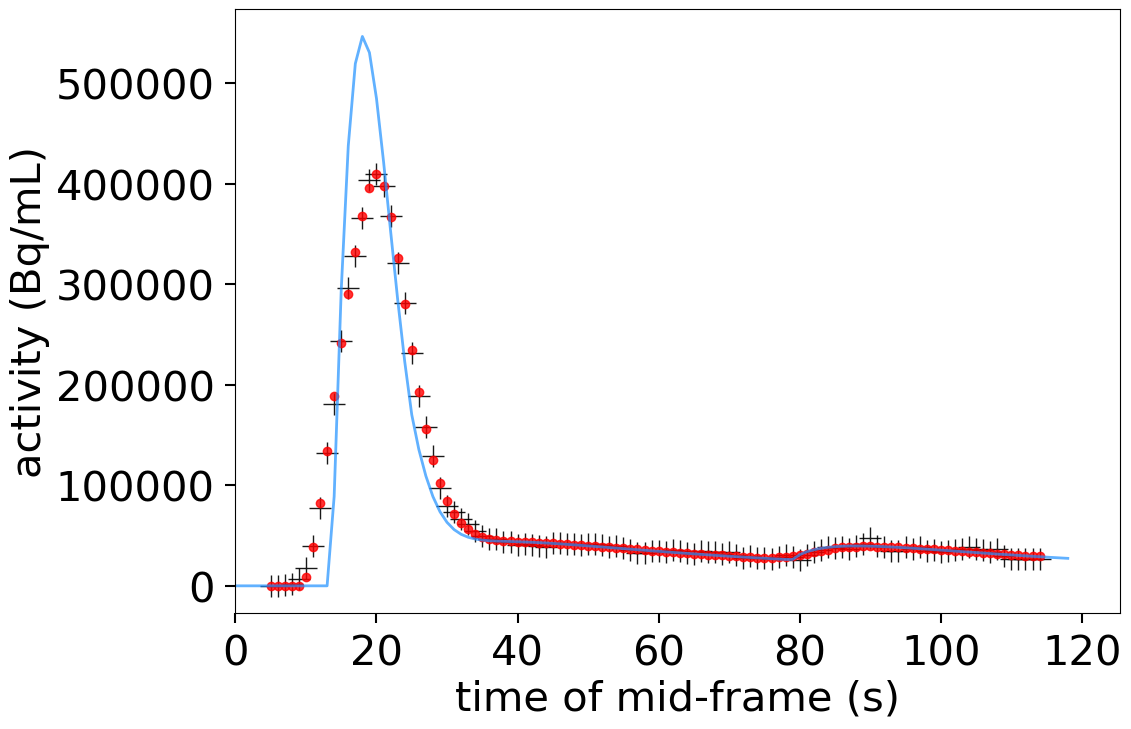

In [6]:
bc.plot_truths(bc.truths)

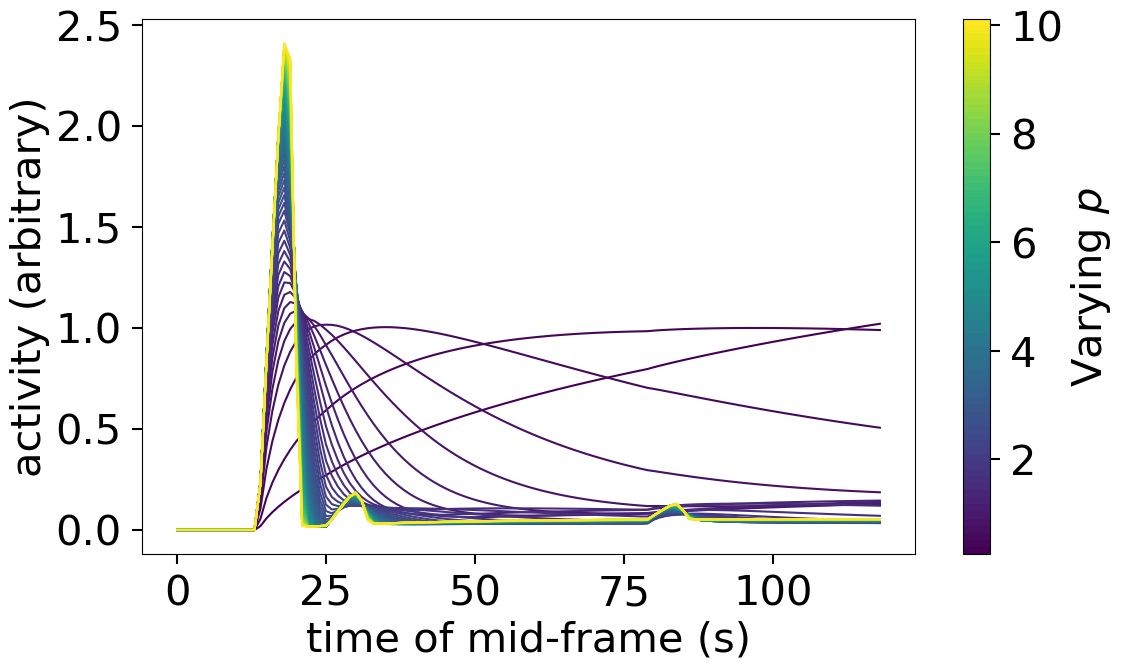

In [7]:
bc.plot_variations(5, 0.25, 10.25 , bc.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# de novo
res = bc.run_nested(print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(bc.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

iter: 16788 | batch: 12 | bound: 11 | nc: 88 | ncall: 1548505 | eff(%):  1.078 | loglstar: -2122.695 < -2116.868 < -2112.478 | logz: -2197.095 +/-  0.395 | stop:  1.255                              

## Inspect RadialArtery

In [ ]:
v = ra.truths
pprint("===================================== v ======================================")
pprint(v)

data = ra.data(v)
pprint("==================================== data ====================================")
pprint(data)

In [ ]:
pprint("============================== ra.data2t(data) ===============================")
pprint(ra.data2t(data))
pprint("============================= ra.data2taus(data) =============================")
pprint(ra.data2taus(data))
pprint("=========================== ra.data2timesMid(data) ===========================")
pprint(ra.data2timesMid(data))
pprint("================================== ra.fqfp ===================================")
pprint(ra.fqfp)
pprint("========================== ra.input_func_measurement =========================")
pprint(ra.input_func_measurement)
pprint("============================ ra.kernel_measurement ===========================")
pprint(ra.kernel_measurement)
pprint("================================= ra.labels ==================================")
pprint(ra.labels)
pprint("=============================== ra.loglike(v) ================================")
pprint(ra.loglike(v))
pprint("====================== ra.load_nii(ra.fqfp + '.nii.gz') ======================")
pprint(ra.load_nii(ra.fqfp + ".nii.gz"))
pprint("================================== ra.ndim ===================================")
pprint(ra.ndim)
pprint("========================= ra.parse_halflife(ra.fqfp) =========================")
pprint(ra.parse_halflife(ra.fqfp))
pprint("========================= ra.parse_isotope(ra.fqfp) ==========================")
pprint(ra.parse_isotope(ra.fqfp))
pprint("================================== ra.sigma ==================================")
pprint(ra.sigma)
pprint("============================ ra.signalmodel(data) ============================")
pprint(ra.signalmodel(data))

In [ ]:
# pprint("========================== ra.prior_transform('ho') ==========================")
# pprint(ra.prior_transform("ho"))
# pprint("========================== ra.prior_transform_co(v) ==========================")
# pprint(ra.prior_transform_co(v))
# pprint("========================== ra.prior_transform_oo(v) ==========================")
# pprint(ra.prior_transform_oo(v))
# pprint("======================== ra.prior_transform_default(v) =======================")
# pprint(ra.prior_transform_default(v))

## Plot RadialArtery

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

## Inspect Raichle1983Model

In [ ]:
pprint(rm.labels)
pprint(rm.ndim)
pprint(rm.truths)

## Plot Raichle1983Model

In [ ]:
rm.plot_truths()

In [ ]:
rm.plot_variations(tindex=0, tmin=0.0001, tmax=0.01)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
res = rm.run_nested()
pprint(res)

In [ ]:
rm.plot_results(res)

# Misc. Testing

In [ ]:
from pympler import asizeof
asizeof.asizeof(res)

In [ ]:
res.asdict()

In [ ]:
rd = res.asdict()
rd

In [ ]:
rd["logz"][-1]

In [ ]:
rd["information"][-1]

In [ ]:
res.summary()

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

fqfn = os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-BrainMoCo2-createNiftiMovingAvgFrames-ParcWmparc-reshape-to-wmparc-wmparc.nii.gz")
nii = nib.load(fqfn)
img = nii.get_fdata()
plt.imshow(img, cmap="gray", origin="lower")
plt.figure(figsize=(12, 8))
plt.plot(img[0,], linewidth=2)